# Importing dependencies

In [ ]:
!sudo apt-get install libportaudio2
!pip install sounddevice

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (975 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155222 files

In [ ]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import math

## Taking input

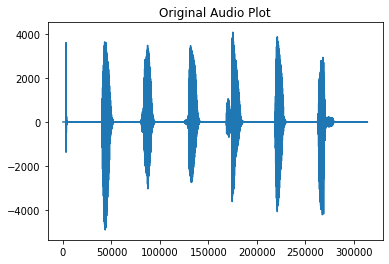

In [ ]:
fs, data = wavfile.read('Audio.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

## Playing that sound

## Generating public and private keys for RSA algorithm

Select two prime no's. Suppose P = 53 and Q = 59.

Now First part of the Public key  : n = P*Q = 3127.

We also need a small exponent say e : 
But e Must be 

    1) An integer.

    2) Not be a factor of n.
 
    3) 1 < e < Φ(n) [Φ(n) is discussed below], 
    Let us now consider it to be equal to 3.
    
Our Public Key is made of n and e

1) We need to calculate Φ(n):
    
    Such that Φ(n) = (P-1)(Q-1)     
      so,  Φ(n) = 3016

    
2) Now calculate Private Key, d : 
    
    d = (k*Φ(n) + 1) / e for some integer k
    For k = 2, value of d is 2011.

In [ ]:
p1 = int(input("Enter a prime number: "))
p2 = int(input("Enter another prime number: "))

n = p1*p2
print("n = p1*p2 = ",n)

Enter a prime number: 3
Enter another prime number: 11
n = p1*p2 =  33


In [ ]:
e = int(input("Enter a small, odd number, co-prime with n: "))
k = int(input("Enter value of k:"))

Enter a small, odd number, co-prime with n: 7
Enter value of k:2


In [ ]:
phi = (p1-1)*(p2-1)
print("phi = ",phi)
d = int((k*phi+1)/e)
print("d= ",d)

phi =  20
d=  5


In [ ]:
public_key = n,e
private_key = n,d

print("Public Key = ", public_key)
print("Private Key = ",private_key)

Public Key =  (33, 7)
Private Key =  (33, 5)


## Encrpytion of audio file

Text(0.5, 1.0, 'Encrypted Audio Plot')

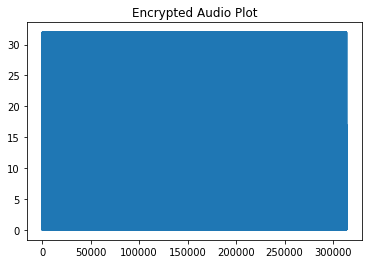

In [ ]:
encrypted = (data**e)%n
plt.plot(encrypted)
plt.title("Encrypted Audio Plot")

## Saving the saved file

In [ ]:
encrypted = np.asarray(encrypted, dtype=np.int16)
wavfile.write('encrypted_rsa.wav', fs, encrypted)
print("A file titled 'encrypted_rsa.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_rsa.wav' is generated which is the encrypted audio to be communicated


In [ ]:
encrypted

array([ 0,  0, 32, ..., 24, 24, 17], dtype=int16)

## Loading and decrypting

Text(0.5, 1.0, 'Encrypted Audio Plot')

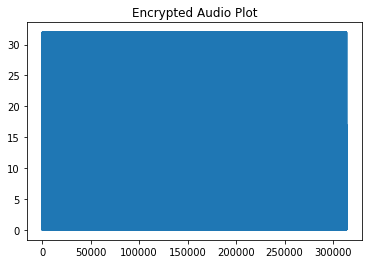

In [ ]:
fs, Data = wavfile.read('encrypted_rsa.wav')
plt.plot(Data)
plt.title("Encrypted Audio Plot")

## Decryption of data

Text(0.5, 1.0, 'Decrypted Audio Plot')

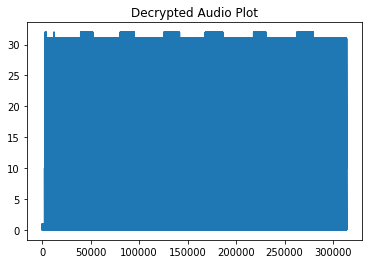

In [ ]:
decrypted = (Data**d)%n
plt.plot(decrypted)
plt.title('Decrypted Audio Plot')

In [ ]:
decrypted

array([ 0,  0,  0, ...,  1,  1, 10], dtype=int16)

In [ ]:
RMSE = (sum((encrypted-decrypted)**2))**(1/2)
print(RMSE)

7378.5147556944


In [ ]:
R=(2*sum((encrypted-decrypted)**2))**(1/2)

In [ ]:
CD=10*math.log(R,10)
print(CD)

40.184839479582514


In [ ]:
A=sum(decrypted)
B=sum(abs(encrypted-decrypted))
SSSNR=10*math.log(A/B)

In [ ]:
SSSNR

-3.5046926485111363